In [87]:
import numpy as np
import matplotlib.pyplot as plt
import tools

from data import temperature
from data import sample_HC
from data import err_sample_HC
from data import err_temperature

squared_temperature = temperature**2  # K**2
C_div_T = sample_HC/temperature  # mJ/K**2.mol
err_C_divT = err_sample_HC/temperature

In [71]:
# Constantes et tableaux

k = 1.380649e-23
delta = 2.9461005*k*2.4
temp = np.arange(0, 10, 1e-3)


In [81]:
def max_schottky(x, y, min, max):
    """Find the maximum of the Schottky anomaly in a given interval"""
    x_interval, y_interval = tools.tab_interval(x, y, min, max)
    maxi, i = tools.maximum(y_interval)
    x_maxi = x_interval[i]
    return x_maxi, maxi


def schottky(T, E, n=1, r=8.31446261815324, na = 6.02214076e23, k=1.380649e-23):
    """Calculate the Schottky anomaly"""
    """T: temperature in Kelvin, E: energy in Joules, n: number of particles, k: Boltzmann constant"""
    x = (E)/(k*T)
    cs = (x**2)*(np.exp(x)/(1+np.exp(x))**2)
    return r*cs

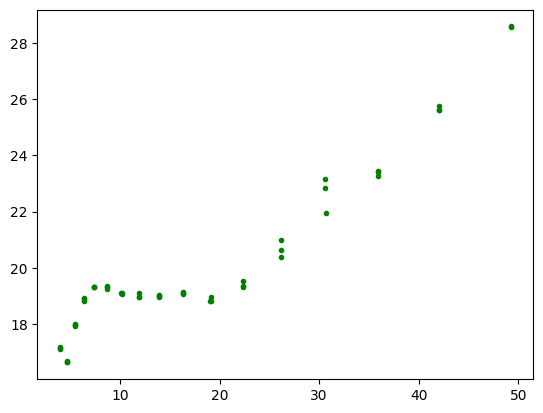

In [ ]:
plt.figure()
plt.plot(squared_temperature[0:50], C_div_T[0:50], ".g")
plt.show()


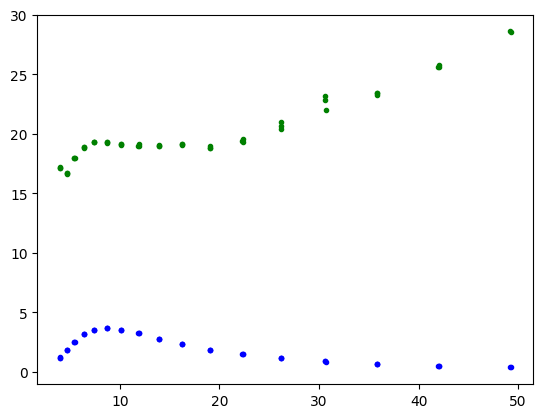

In [85]:
T_eq = max_schottky(squared_temperature, C_div_T, 0, 16)
E = T_eq[0] * k * 2.4

plt.figure()
plt.plot(squared_temperature[0:50], C_div_T[0:50], ".g")
plt.plot(squared_temperature[0:50], schottky(squared_temperature[0:50], E, n=1), ".b")
plt.show()